<h1 align="center">DL Assignment: Flower Recognition (Multi-class Classification)</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image_dataset_from_directory
from keras import models, layers, losses, regularizers

# Loading Data and Preprocessing

I have my dataset in my Google Drive and the Drive is mounted in Colab.

Let's load images into tensors using image_dataset_from_directory api. It will also load labels into one-hot encoded vectors.

In [2]:
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
dataset_directory = '/content/drive/MyDrive/datasets/flowers'
image_height = 256
image_width = 256
batch_size = 64
num_train_images = 2594
num_test_images = 1729

Loading 60% of the total images into training dataset.

In [3]:
data_train = image_dataset_from_directory(
  dataset_directory,
  labels='inferred',
  label_mode='categorical',
  color_mode='rgb',
  batch_size=1,
  image_size=(image_height, image_width),
  shuffle=True,
  seed=1223,
  validation_split=0.4,
  subset='training'
)

Found 4323 files belonging to 5 classes.
Using 2594 files for training.


Loading 40% of the total images into testing dataset.

In [4]:
data_test = image_dataset_from_directory(
  dataset_directory,
  labels='inferred',
  label_mode='categorical',
  color_mode='rgb',
  batch_size=1,
  image_size=(image_height, image_width),
  shuffle=True,
  seed=1223,
  validation_split=0.4,
  subset='validation'
)

Found 4323 files belonging to 5 classes.
Using 1729 files for validation.


## Separating Datasets into Samples and Labels

Now, let's separate our training and testing data into samples and labels.

In [5]:
x_train = np.zeros((num_train_images, image_height, image_width, 3), dtype=np.float32)
y_train = np.zeros((num_train_images, 5), dtype=np.float32)

x_test = np.zeros((num_test_images, image_height, image_width, 3), dtype=np.float32)
y_test = np.zeros((num_test_images, 5), dtype=np.float32)

In [ ]:
for i, sample in data_train.enumerate():
  print(i)
  x_train[i] = sample[0]
  y_train[i] = sample[1]

In [ ]:
for i, sample in data_test.enumerate():
  print(i)
  x_test[i] = sample[0]
  y_test[i] = sample[1]

## Data Normalization and Vectorization

Here, I'm normalizing the samples and reshaping them into the shape (samples, features) from (samples, height, width, channels).

In [8]:
x_train = x_train / 255.0
x_train = x_train.reshape(num_train_images, image_height*image_width*3)

In [9]:
x_test = x_test / 255.0
x_test = x_test.reshape(num_test_images, image_height*image_width*3)

All classes have pretty good representation in both the datasets.

In [10]:
print("Numer of samples by class names for training dataset.")
for i in range(5):
  print(class_names[i], ":", y_train[:, i].sum())

Numer of samples by class names for training dataset.
daisy : 472.0
dandelion : 614.0
rose : 484.0
sunflower : 451.0
tulip : 573.0


In [11]:
print("Numer of samples by class names for testing dataset.")
for i in range(5):
  print(class_names[i], y_test[:, i].sum())

Numer of samples by class names for testing dataset.
daisy 297.0
dandelion 438.0
rose 300.0
sunflower 283.0
tulip 411.0


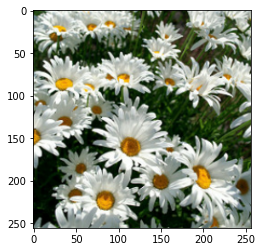

In [12]:
plt.clf()
plt.imshow(x_train[1].reshape((256,256,3)))
plt.show()

# Building the Model

In [13]:
def build_model(num_hidden_layers=1, num_hidden_units=8):
  model = models.Sequential()
  model.add(layers.Dense(num_hidden_units, activation='relu', input_shape=(image_height*image_width*3, )))
  for i in range(num_hidden_layers):
    model.add(layers.Dense(num_hidden_units, activation='relu'))
  model.add(layers.Dense(5, activation='softmax'))

  model.compile(
    optimizer='rmsprop',
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
  )

  return model

In [14]:
num_hidden_layers = 10
num_hidden_units = 1024

model = build_model(num_hidden_layers, num_hidden_units)

In [15]:
history = model.fit(
  x_train,
  y_train,
  epochs=100,
  batch_size=64,
  validation_split=0.3
)

Epoch 1/100
29/29 [==============================] - 72s 2s/step - loss: 1321.4762 - accuracy: 0.2412 - val_loss: 1.6074 - val_accuracy: 0.2259
Epoch 2/100
29/29 [==============================] - 68s 2s/step - loss: 1.6193 - accuracy: 0.2339 - val_loss: 1.6209 - val_accuracy: 0.2105
Epoch 3/100
29/29 [==============================] - 68s 2s/step - loss: 1.6326 - accuracy: 0.2108 - val_loss: 1.6088 - val_accuracy: 0.2080
Epoch 4/100
29/29 [==============================] - 68s 2s/step - loss: 1.6182 - accuracy: 0.2171 - val_loss: 1.6332 - val_accuracy: 0.1938
Epoch 5/100
29/29 [==============================] - 68s 2s/step - loss: 1.6250 - accuracy: 0.2228 - val_loss: 1.6060 - val_accuracy: 0.2195
Epoch 6/100
29/29 [==============================] - 68s 2s/step - loss: 1.6174 - accuracy: 0.2179 - val_loss: 1.6066 - val_accuracy: 0.2375
Epoch 7/100
29/29 [==============================] - 68s 2s/step - loss: 1.6220 - accuracy: 0.2262 - val_loss: 1.6064 - val_accuracy: 0.2144
Epoch 8/10

In [16]:
his_dict = history.history
val_acc = his_dict['val_accuracy']
acc = his_dict['accuracy']

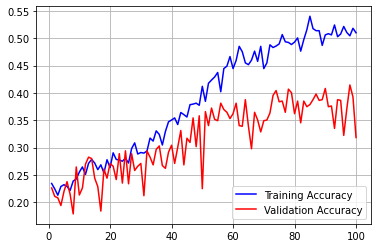

In [17]:
plt.clf()
plt.plot(range(1, 101), acc, 'b')
plt.plot(range(1, 101), val_acc, 'r')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.grid()
plt.show()

Model is overfitting after 60 epochs.

# Final Model

In [20]:
model2 = build_model(num_hidden_layers=10, num_hidden_units=1024)
model2.fit(
  x_train,
  y_train,
  epochs=60,
  batch_size=64
)

Epoch 1/60
41/41 [==============================] - 95s 2s/step - loss: 758.1260 - accuracy: 0.1954
Epoch 2/60
41/41 [==============================] - 90s 2s/step - loss: 1.6400 - accuracy: 0.2087
Epoch 3/60
41/41 [==============================] - 89s 2s/step - loss: 1.6385 - accuracy: 0.2164
Epoch 4/60
41/41 [==============================] - 90s 2s/step - loss: 1.6236 - accuracy: 0.2463
Epoch 5/60
41/41 [==============================] - 90s 2s/step - loss: 1.9142 - accuracy: 0.2263
Epoch 6/60
41/41 [==============================] - 89s 2s/step - loss: 1.8608 - accuracy: 0.2450
Epoch 7/60
41/41 [==============================] - 99s 2s/step - loss: 1.6044 - accuracy: 0.2455
Epoch 8/60
41/41 [==============================] - 90s 2s/step - loss: 1.6250 - accuracy: 0.2448
Epoch 9/60
41/41 [==============================] - 90s 2s/step - loss: 1.7758 - accuracy: 0.2257
Epoch 10/60
41/41 [==============================] - 91s 2s/step - loss: 1.5981 - accuracy: 0.2796
Epoch 11/60
41/41

# Final Evaluation

In [23]:
model2.evaluate(x_test, y_test)

55/55 [==============================] - 17s 306ms/step - loss: 1.3901 - accuracy: 0.3985


[1.3900701999664307, 0.39849624037742615]

After trying a lot, I couldn't achieve better accuracy than 40% with Dense layers only. However, a random guessing can achieve an accuracy of 20%. So, we are well above this benchmark.